# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [29]:
df = df.drop('Unnamed: 32', axis=1)
dfc = df.drop('diagnosis', axis=1)
dfc.head()

id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638                  0.17300
4  84358402        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [30]:
df['diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1, 0])

In [31]:
df.head()

id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
0    842302          1  ...          0.4601                  0.11890
1    842517          1  ...          0.2750                  0.08902
2  84300903          1  ...          0.3613                  0.08758
3  84348301          1  ...          0.6638                  0.17300
4  84358402          1  ...          0.2364                  0.07678

[5 rows x 32 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [32]:
# Perform K-Means Clustering on the Dataset

In [33]:
# Get the sum of squares to be able to plot 
# The elbow method.
sum_of_squared_distances = []
K = range(1,32)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfc)
    sum_of_squared_distances.append(km.inertia_)

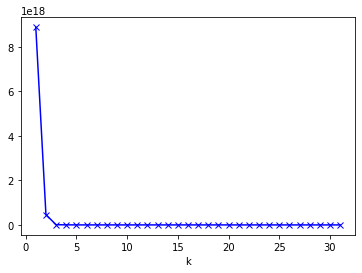

In [34]:
# The Elbow Method to get the numbers of clusters
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k');

In [35]:
# Do the number co cluster for KMeans
km = KMeans(n_clusters=2)
# Run the fit command
km.fit(dfc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
# See the labels
labels = km.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [37]:
# Add the cluster to the DataFrame
dfc['cluster'] = labels
dfc.head()

id  radius_mean  ...  fractal_dimension_worst  cluster
0    842302        17.99  ...                  0.11890        0
1    842517        20.57  ...                  0.08902        0
2  84300903        19.69  ...                  0.08758        0
3  84348301        11.42  ...                  0.17300        0
4  84358402        20.29  ...                  0.07678        0

[5 rows x 32 columns]

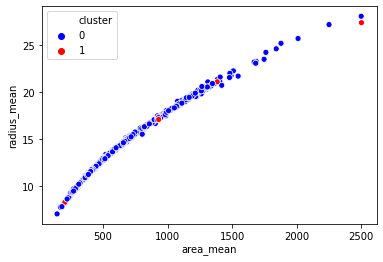

In [38]:
# Do the Graph
features = ['area_mean', 'radius_mean']
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=features[0], y=features[1], data=dfc, hue="cluster", palette = dic);

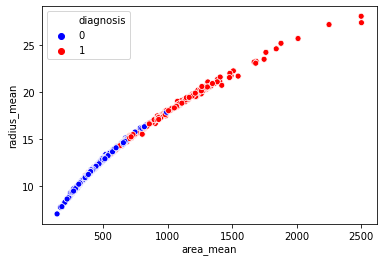

In [39]:
# Do the Graph on original data
features_o = ['area_mean', 'radius_mean']
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=features_o[0], y=features_o[1], data=df, hue="diagnosis", palette = dic);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [40]:
# adding the cluster number to the orignal data
df['cluster'] = labels
# Get the correct answers
correct = np.where(df['diagnosis']==df['cluster'])
# convert to a DataFrame
correct = pd.DataFrame(correct)
# Calculate the percentage
(correct.shape[1]) / (df.shape[0])

0.6256590509666081

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [41]:
##### Your Code Here #####

In [42]:
# Copy the dfc data
dfc_processed = dfc.copy()

In [43]:
# Scale the data
scaler = StandardScaler()
dfc_processed = scaler.fit_transform(dfc_processed)
dfc_processed

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.75062224,
         1.93701461, -0.14040392],
       [-0.23640344,  1.82982061, -0.35363241, ..., -0.24388967,
         0.28118999, -0.14040392],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.152255  ,
         0.20139121, -0.14040392],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ..., -1.10454895,
        -0.31840916, -0.14040392],
       [-0.23572517,  1.83834103,  2.33645719, ...,  1.91908301,
         2.21963528, -0.14040392],
       [-0.24240586, -1.80840125,  1.22179204, ..., -0.04813821,
        -0.75120669, -0.14040392]])

In [81]:
# Apply PCA to the data
pca1 = PCA(n_components=10)
pca1_features = pca1.fit_transform(dfc_processed)
pca1_features = pd.DataFrame(pca1_features)
pca1_features

0          1         2  ...         7         8         9
0     9.176281   1.994417 -1.250350  ...  2.168185 -0.297739 -0.153238
1     2.380743  -3.737364 -0.695691  ...  0.023805  0.374341 -0.671517
2     5.739059  -1.067103 -0.567370  ... -0.672397  0.052066  0.002948
3     7.114744  10.286398 -2.935701  ...  1.383917  1.234859 -1.227277
4     3.944187  -1.955890  1.311379  ... -0.929203  0.673187 -0.141934
..         ...        ...       ...  ...       ...       ...       ...
564   6.433521  -3.556262  2.185780  ... -0.565126 -0.130626  1.043284
565   3.787523  -3.563686  1.806597  ... -0.664120 -1.011024 -0.239007
566   1.249566  -1.886128  0.440292  ... -0.189126  0.293850  0.469279
567  10.357685   1.723274 -1.945883  ...  0.239486 -0.145817 -0.551865
568  -5.479188  -0.677733  1.399493  ...  1.671418  1.000894  0.594263

[569 rows x 10 columns]

In [ ]:
# How much did we keep
sum(pca1.explained_variance_ratio_)

In [63]:
# How much did we loss
1-sum(pca1.explained_variance_ratio_)

0.05710689478019371

In [75]:
# Apply PCA to the data
pca2 = PCA(n_components=3)
pca2_features = pca2.fit_transform(dfc_processed)
pca2_features = pd.DataFrame(pca2_features)
pca2_features

0          1         2
0     9.176281   1.994417 -1.250350
1     2.380743  -3.737364 -0.695691
2     5.739059  -1.067103 -0.567370
3     7.114744  10.286398 -2.935701
4     3.944187  -1.955890  1.311379
..         ...        ...       ...
564   6.433521  -3.556262  2.185780
565   3.787523  -3.563686  1.806597
566   1.249566  -1.886128  0.440292
567  10.357685   1.723274 -1.945883
568  -5.479188  -0.677733  1.399493

[569 rows x 3 columns]

In [69]:
# How much did we keep
sum(pca2.explained_variance_ratio_)

0.6843490263725758

In [70]:
# How much did we loss
1-sum(pca2.explained_variance_ratio_)

0.3156509736274242

In [71]:
# define the number of components
num_components1=len(pca1.explained_variance_ratio_)
print(num_components1)
num_components2=len(pca2.explained_variance_ratio_)
num_components2

10


3

In [72]:
# create a numpy array as long as the number of components
ind1 = np.arange(num_components1) 
print(ind1)
ind2 = np.arange(num_components2) 
ind2

[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2])

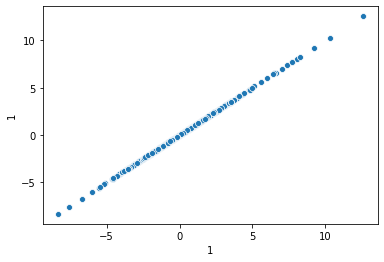

In [84]:
# Do the Graph on PCA1
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=pca1_features[1], y=pca2_features[1], data=pca2_features, palette = dic);

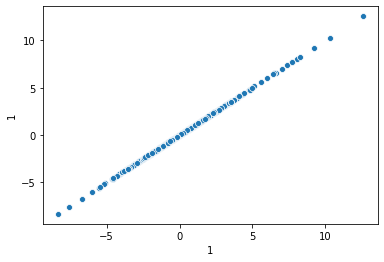

In [80]:
# Do the Graph on PCA2
dic = {0:"Blue", 1:"Red"}
sns.scatterplot(x=pca2_features[1], y=pca2_features[1], data=pca2_features, palette = dic);

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project